In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv("iris_csv.csv")

In [3]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
corr_matrix = iris.corr() # Return Coorelation
corr_matrix['sepallength'].sort_values(ascending = False)

sepallength    1.000000
petallength    0.871754
petalwidth     0.817954
sepalwidth    -0.109369
Name: sepallength, dtype: float64

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

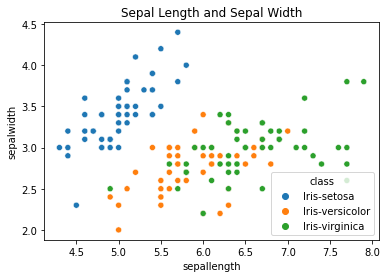

In [8]:
sns.scatterplot(x = 'sepallength',y = 'sepalwidth',data = iris, hue = 'class')
plt.title('Sepal Length and Sepal Width')
plt.show()

In [9]:
iris['sepallength'].corr(iris['sepalwidth'])

-0.1093692499506493

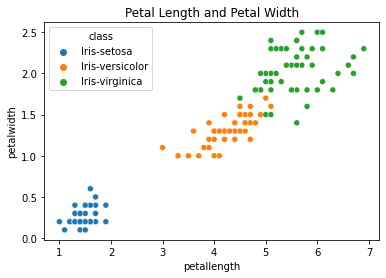

In [10]:
sns.scatterplot(x = 'petallength', y = 'petalwidth', data = iris, hue = 'class')
plt.title('Petal Length and Petal Width')
plt.show()

In [11]:
iris['petallength'].corr(iris['petalwidth'])

0.9627570970509659

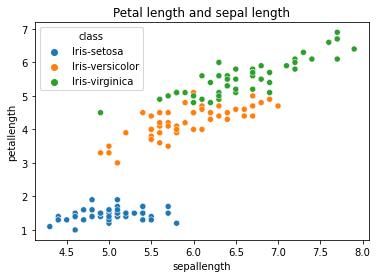

In [12]:
sns.scatterplot(x = 'sepallength', y = 'petallength', data = iris, hue = 'class')
plt.title('Petal length and sepal length')
plt.show()

In [13]:
iris['sepallength'].corr(iris['petallength'])

0.8717541573048712

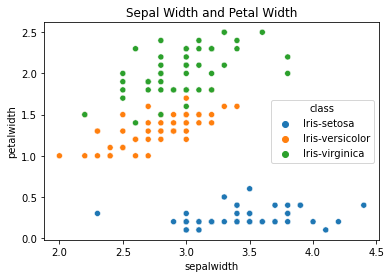

In [14]:
sns.scatterplot(x = 'sepalwidth', y = 'petalwidth', data = iris, hue = 'class')
plt.title('Sepal Width and Petal Width')
plt.show()

In [15]:
iris['sepalwidth'].corr(iris['petalwidth'])

-0.35654408961380574

In [16]:
x = iris.drop('class', axis = 1)
y = iris['class'].copy()

In [17]:
# Train Test Splitting.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [19]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model.predict(x_test)

In [21]:
y_test.head()

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: class, dtype: object

In [22]:
y_pred[:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [25]:
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [26]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

1.0

## RandomForestClassifier

In [27]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# rfc.fit(x_train, y_train)

In [28]:
# y_pred = rfc.predict(x_test)

In [29]:
# y_test.head()

In [30]:
# y_pred[:5]

In [31]:
# print(confusion_matrix(y_test, y_pred))

In [32]:
# print(classification_report(y_test, y_pred))

## Save the Model

In [33]:
from joblib import dump
dump(model, 'model.pkl')

['model.pkl']